# Snow and Rain Prediction for Albany NY

Importing all the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

Reading the csv file

In [2]:
df=pd.read_csv('Albany Precip.csv')

In [3]:
df.head(10)

,Date,Max Temperature(F),Min Temperature(F),Precipitation(IN),Snowfall(IN),SnowDepth(IN),Unnamed: 6,Unnamed: 7
0,01-06-1938,80,47,0.0000,0.0,0.0,NaN,NaN
1,02-06-1938,79,49,0.2000,0.0,0.0,NaN,NaN
2,03-06-1938,74,57,0.1600,0.0,0.0,NaN,NaN
3,04-06-1938,77,49,0.0000,0.0,0.0,NaN,
4,05-06-1938,72,56,0.0000,0.0,0.0,NaN,NaN
5,06-06-1938,79,45,0.0000,0.0,0.0,NaN,NaN
6,07-06-1938,89,63,0.0001,0.0,0.0,NaN,NaN
7,08-06-1938,77,55,0.1300,0.0,0.0,NaN,NaN
8,09-06-1938,72,47,0.0000,0.0,0.0,NaN,NaN
9,10-06-1938,78,42,0.0001,0.0,0.0,NaN,NaN


Dropping the unwanted columns using regular expression

In [4]:
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

In [5]:
df.head()

,Date,Max Temperature(F),Min Temperature(F),Precipitation(IN),Snowfall(IN),SnowDepth(IN)
0,01-06-1938,80,47,0.00,0.0,0.0
1,02-06-1938,79,49,0.20,0.0,0.0
2,03-06-1938,74,57,0.16,0.0,0.0
3,04-06-1938,77,49,0.00,0.0,0.0
4,05-06-1938,72,56,0.00,0.0,0.0


Trying to check if there are any null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29522 entries, 0 to 29521
Data columns (total 6 columns):
Date                  29521 non-null object
Max Temperature(F)    29522 non-null int64
Min Temperature(F)    29522 non-null int64
Precipitation(IN)     29521 non-null float64
Snowfall(IN)          29521 non-null float64
SnowDepth(IN)         29521 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.4+ MB


Converting the Date colummn to date data type

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df['Date']

0       1938-01-06
1       1938-02-06
2       1938-03-06
3       1938-04-06
4       1938-05-06
           ...    
29517   2019-03-25
29518   2019-03-26
29519   2019-03-27
29520   2019-03-28
29521          NaT
Name: Date, Length: 29522, dtype: datetime64[ns]

# Exploratory Data Analysis
-> Helps to remove data with errors
-> Helps to get insight of the co-related features

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


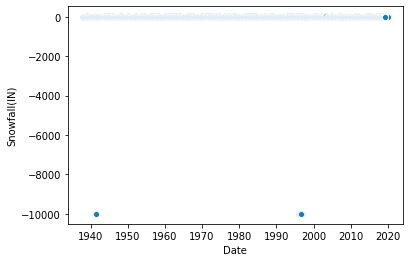

In [9]:
sns.scatterplot(x=df['Date'],y=df['Snowfall(IN)'])

--> Snowfall cannot be negative. Hence, removing records with garbage values

In [10]:
df=df[df['Snowfall(IN)']>=0]

Adding a month and year column for better data projection

In [11]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year']=pd.DatetimeIndex(df['Date']).year
df

,Date,Max Temperature(F),Min Temperature(F),Precipitation(IN),Snowfall(IN),SnowDepth(IN),month,year
0,1938-01-06,80,47,0.0000,0.0,0.0,1,1938
1,1938-02-06,79,49,0.2000,0.0,0.0,2,1938
2,1938-03-06,74,57,0.1600,0.0,0.0,3,1938
3,1938-04-06,77,49,0.0000,0.0,0.0,4,1938
4,1938-05-06,72,56,0.0000,0.0,0.0,5,1938
...,...,...,...,...,...,...,...,...
29516,2019-03-24,57,26,0.0000,0.0,0.0,3,2019
29517,2019-03-25,46,28,0.0000,0.0,0.0,3,2019
29518,2019-03-26,45,21,0.0000,0.0,0.0,3,2019
29519,2019-03-27,50,22,0.0000,0.0,0.0,3,2019


Pairplot: Gives us the relation information of one feature with every other in the dataframe

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


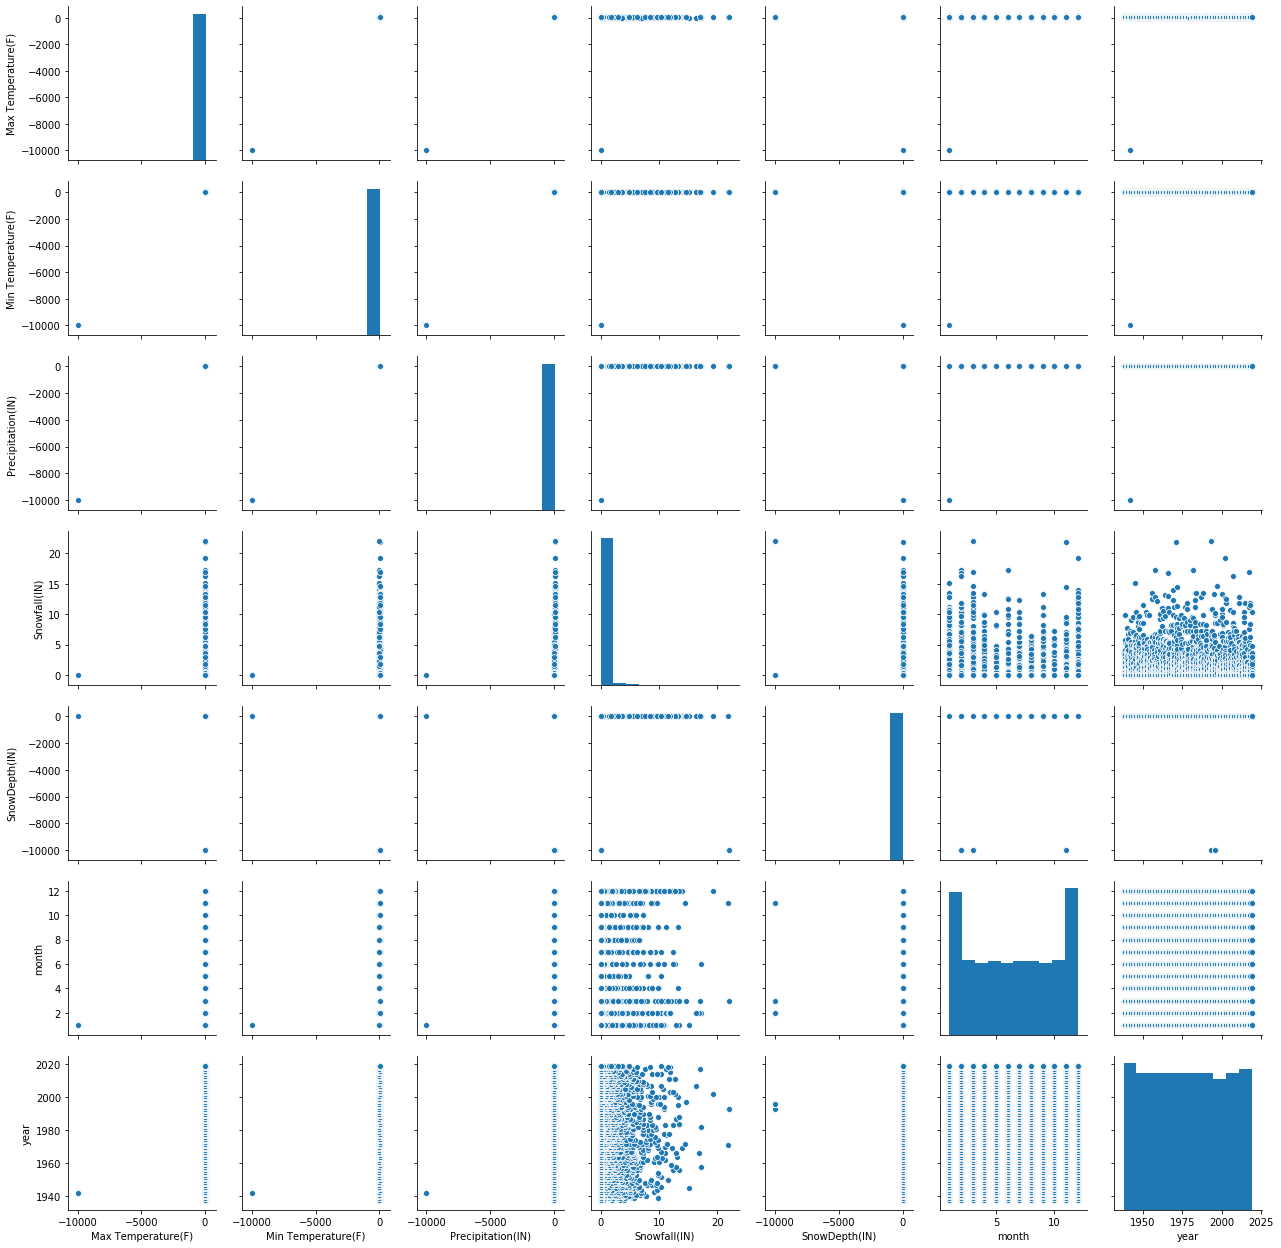

In [12]:
sns.pairplot(data=df)

In [13]:
df.corr() # Gives us the co-relation matrix

,Max Temperature(F),Min Temperature(F),Precipitation(IN),Snowfall(IN),SnowDepth(IN),month,year
Max Temperature(F),1.000000,0.991233,0.942715,-0.079681,0.003029,0.039093,0.011281
Min Temperature(F),0.991233,1.000000,0.952417,-0.058859,0.001081,0.043246,0.019820
Precipitation(IN),0.942715,0.952417,1.000000,0.002315,-0.000214,0.009388,0.009182
Snowfall(IN),-0.079681,-0.058859,0.002315,1.000000,-0.047995,-0.034728,0.001755
SnowDepth(IN),0.003029,0.001081,-0.000214,-0.047995,1.000000,0.002139,-0.010829
month,0.039093,0.043246,0.009388,-0.034728,0.002139,1.000000,-0.009846
year,0.011281,0.019820,0.009182,0.001755,-0.010829,-0.009846,1.000000


# HeatMap for better information

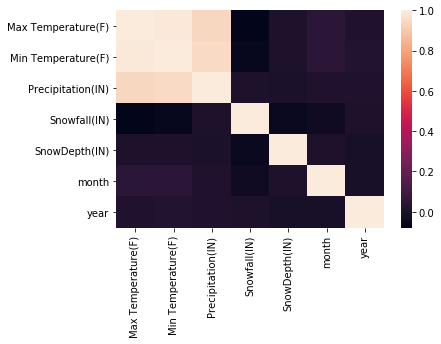

In [14]:
sns.heatmap(df.corr())

Removing error/very large values that effect prediction

In [15]:
df=df[df['Max Temperature(F)']>-10]

In [16]:
df=df[df['SnowDepth(IN)']>=0]

After removing erroneus values. Seems quite better

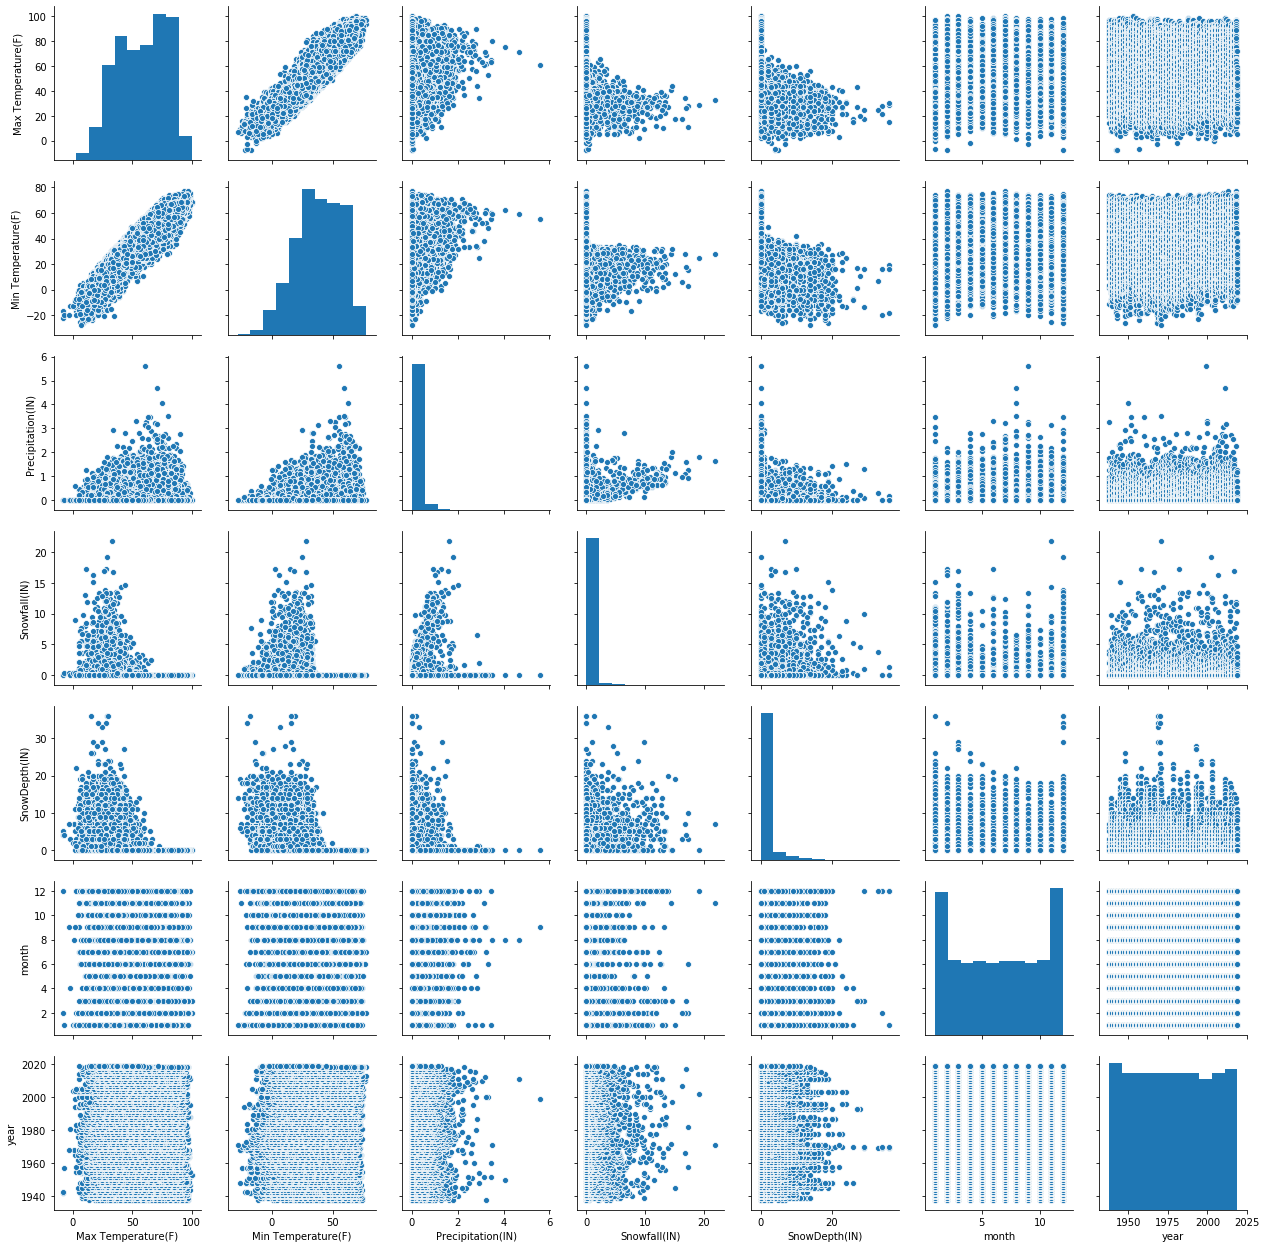

In [17]:
sns.pairplot(data=df)

Trying to find some relationship among the features

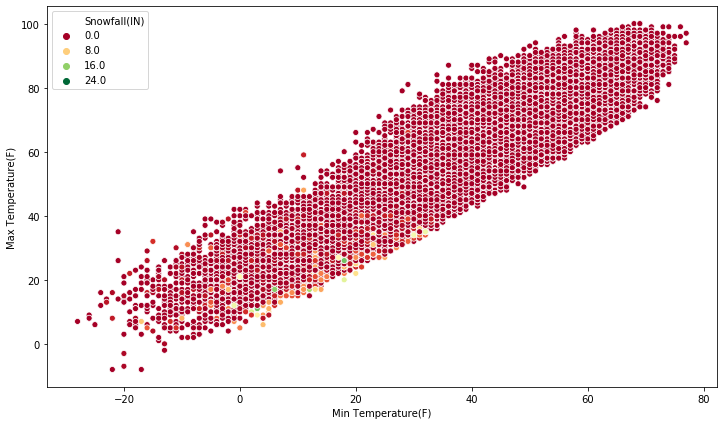

In [18]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df['Min Temperature(F)'],y=df['Max Temperature(F)'],hue=df['Snowfall(IN)'],palette='RdYlGn')

In [19]:
df.corr() #Correlation after removing erroneous data

,Max Temperature(F),Min Temperature(F),Precipitation(IN),Snowfall(IN),SnowDepth(IN),month,year
Max Temperature(F),1.000000,0.918304,0.012980,-0.242715,-0.460314,0.090593,0.008425
Min Temperature(F),0.918304,1.000000,0.125814,-0.197007,-0.473464,0.112375,0.036828
Precipitation(IN),0.012980,0.125814,1.000000,0.277285,0.001602,0.012660,0.028133
Snowfall(IN),-0.242715,-0.197007,0.277285,1.000000,0.267818,-0.034260,0.001281
SnowDepth(IN),-0.460314,-0.473464,0.001602,0.267818,1.000000,-0.143914,-0.014130
month,0.090593,0.112375,0.012660,-0.034260,-0.143914,1.000000,-0.009884
year,0.008425,0.036828,0.028133,0.001281,-0.014130,-0.009884,1.000000


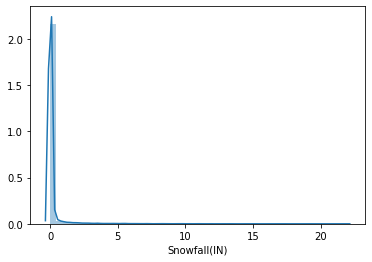

In [20]:
sns.distplot(df['Snowfall(IN)'])

In [21]:
df[df['Snowfall(IN)']>4]

,Date,Max Temperature(F),Min Temperature(F),Precipitation(IN),Snowfall(IN),SnowDepth(IN),month,year
243,1939-01-30,31,13,1.46,9.8,10.0,1,1939
251,1939-07-02,32,23,0.32,5.3,14.0,7,1939
281,1939-09-03,25,19,0.60,5.5,6.0,9,1939
284,1939-12-03,31,17,0.80,5.7,10.0,12,1939
285,1939-03-13,35,21,0.13,4.2,14.0,3,1939
...,...,...,...,...,...,...,...,...
29129,2018-02-03,35,32,1.08,11.9,8.0,2,2018
29134,2018-07-03,36,31,0.65,8.4,3.0,7,2018
29140,2018-03-13,34,30,0.88,11.5,8.0,3,2018
29453,2019-01-20,21,0,1.25,10.4,11.0,1,2019


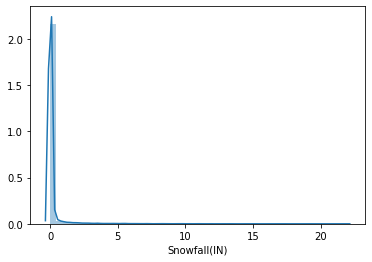

In [22]:
sns.distplot(df['Snowfall(IN)'])

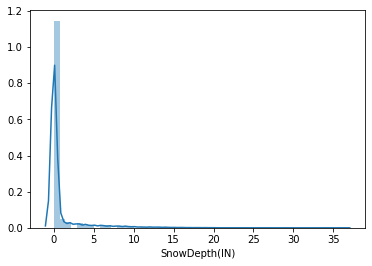

In [23]:
sns.distplot(df['SnowDepth(IN)'])

In [24]:
df

,Date,Max Temperature(F),Min Temperature(F),Precipitation(IN),Snowfall(IN),SnowDepth(IN),month,year
0,1938-01-06,80,47,0.0000,0.0,0.0,1,1938
1,1938-02-06,79,49,0.2000,0.0,0.0,2,1938
2,1938-03-06,74,57,0.1600,0.0,0.0,3,1938
3,1938-04-06,77,49,0.0000,0.0,0.0,4,1938
4,1938-05-06,72,56,0.0000,0.0,0.0,5,1938
...,...,...,...,...,...,...,...,...
29516,2019-03-24,57,26,0.0000,0.0,0.0,3,2019
29517,2019-03-25,46,28,0.0000,0.0,0.0,3,2019
29518,2019-03-26,45,21,0.0000,0.0,0.0,3,2019
29519,2019-03-27,50,22,0.0000,0.0,0.0,3,2019


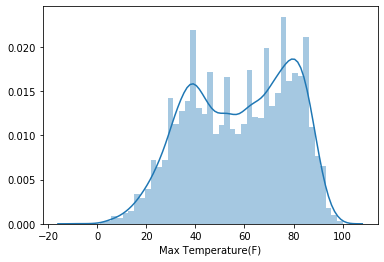

In [25]:
sns.distplot(df['Max Temperature(F)'])

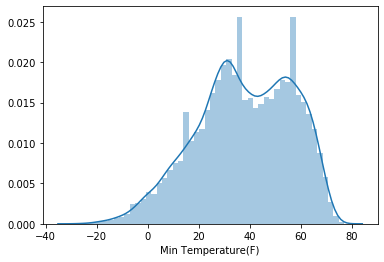

In [26]:
sns.distplot(df['Min Temperature(F)'])

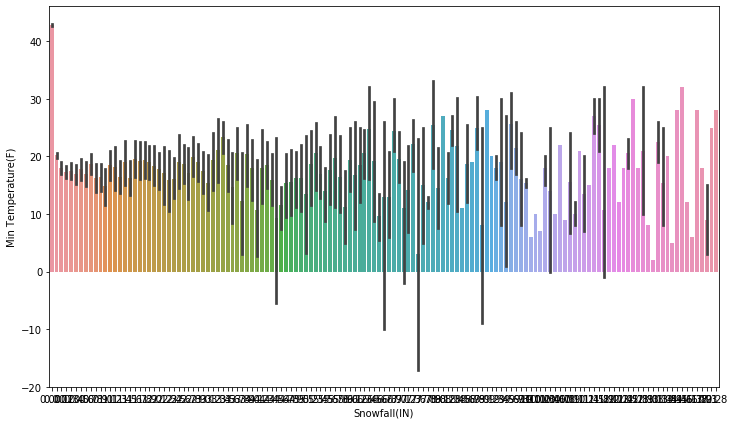

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(x=df['Snowfall(IN)'],y=df['Min Temperature(F)'])

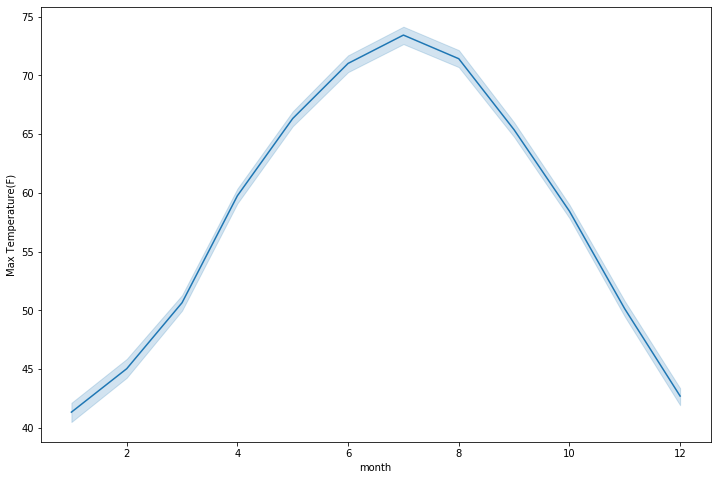

In [28]:
plt.figure(figsize=(12,8),)
#sns.barplot(x=df['Max Temperature(F)'],y=)
sns.lineplot(x=df['month'],y=df['Max Temperature(F)'])

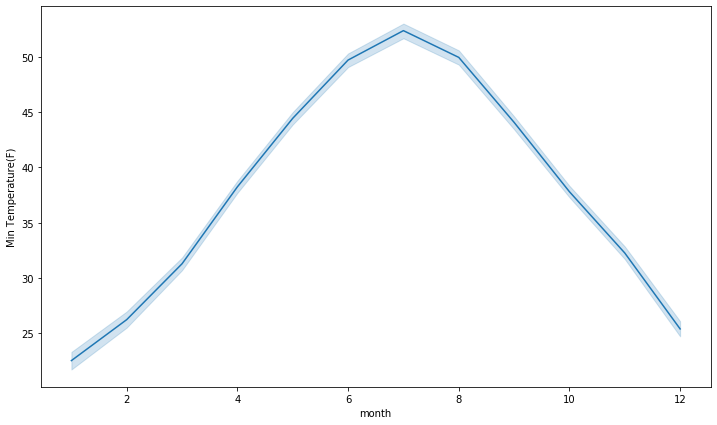

In [29]:
plt.figure(figsize=(12,7))
sns.lineplot(x=df['month'],y=df['Min Temperature(F)'])

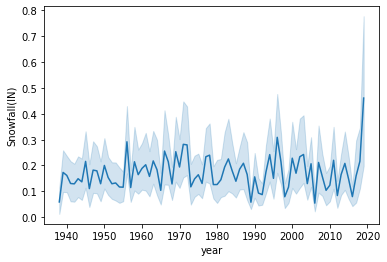

In [30]:
sns.lineplot(x=df['year'],y=df['Snowfall(IN)'],)

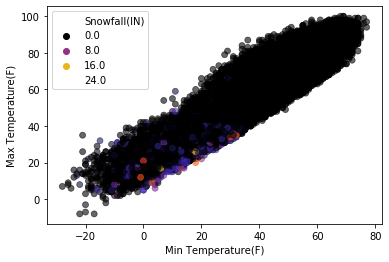

In [31]:
sns.scatterplot(x=df['Min Temperature(F)'],y=df['Max Temperature(F)'],hue=df['Snowfall(IN)'], alpha=0.6 ,palette="CMRmap",edgecolor=None)

Checking for any large value that can cause distortion

In [32]:
df.sort_values('SnowDepth(IN)',ascending=False).head(50)

,Date,Max Temperature(F),Min Temperature(F),Precipitation(IN),Snowfall(IN),SnowDepth(IN),month,year
11533,1969-12-28,29,19,0.1800,1.4000,36.0,12,1969
11534,1969-12-29,30,16,0.0000,0.0000,36.0,12,1969
11537,1970-01-01,15,-18,0.0000,0.0000,36.0,1,1970
11535,1969-12-30,28,16,0.0000,0.0000,34.0,12,1969
11538,1970-02-01,21,-20,0.0000,0.0000,34.0,2,1970
11536,1969-12-31,25,7,0.2900,3.7000,33.0,12,1969
11539,1970-03-01,17,-14,0.0800,1.0000,29.0,3,1970
11532,1969-12-27,25,16,1.3000,9.9000,29.0,12,1969
20010,1993-03-14,20,11,0.2400,4.6000,28.0,3,1993
20012,1993-03-16,43,17,0.0000,0.0000,27.0,3,1993


Creating a new column which distincts if a particular day had snow or no snow by using 1: SNOW and 0: No Snow

In [33]:
df['Snow']=df['Snowfall(IN)']>0

In [34]:
df['Snow']=df['Snow'].map({False:0,True:1})

In [35]:
df['Snow'].value_counts()

0    23298
1     6082
Name: Snow, dtype: int64

In [36]:
df[df['Snow']>0]

,Date,Max Temperature(F),Min Temperature(F),Precipitation(IN),Snowfall(IN),SnowDepth(IN),month,year,Snow
166,1938-11-14,49,33,0.0100,0.0001,0.0,11,1938,1
167,1938-11-15,42,30,0.0001,0.0001,0.0,11,1938,1
168,1938-11-16,37,25,0.0000,0.0001,0.0,11,1938,1
169,1938-11-17,54,36,0.0400,0.0001,0.0,11,1938,1
172,1938-11-20,44,32,0.0000,0.0001,0.0,11,1938,1
...,...,...,...,...,...,...,...,...,...
29505,2019-03-13,44,21,0.0100,0.0001,1.0,3,2019,1
29509,2019-03-17,36,26,0.0001,0.0001,0.0,3,2019,1
29510,2019-03-18,42,25,0.0001,0.0001,0.0,3,2019,1
29514,2019-03-22,43,30,0.3400,0.0001,0.0,3,2019,1


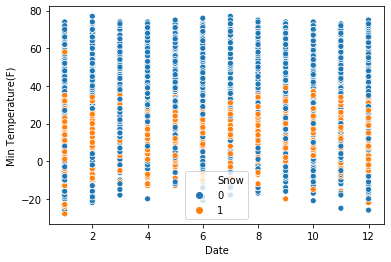

In [37]:
sns.scatterplot(x=df['Date'].dt.month,y=df['Min Temperature(F)'], hue=df['Snow'])

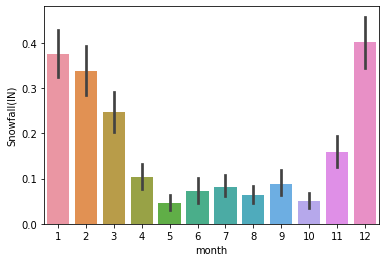

In [38]:
sns.barplot(x=df['month'],y=df['Snowfall(IN)'])

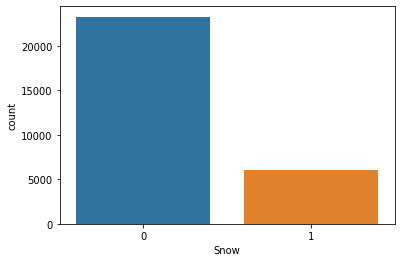

In [39]:
sns.countplot(x=df['Snow'])

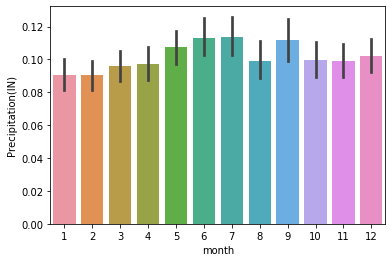

In [40]:
sns.barplot(x=df['month'],y=df['Precipitation(IN)'])

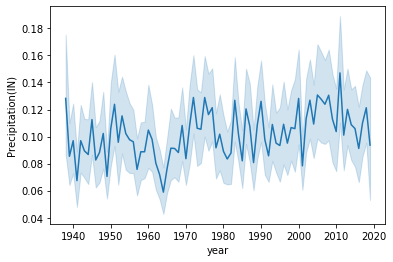

In [41]:
sns.lineplot(x=df['year'],y=df['Precipitation(IN)'])

In [42]:
df['Prec']=df['Precipitation(IN)']>0

In [43]:
df['Prec']=df['Prec'].map({False:0,True:1})

In [44]:
df['Prec'].value_counts()

1    16521
0    12859
Name: Prec, dtype: int64

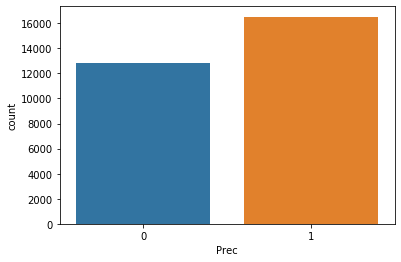

In [45]:
sns.countplot(x=df['Prec'])

In [46]:
df.corr()['Snow']

Max Temperature(F)   -0.585848
Min Temperature(F)   -0.516452
Precipitation(IN)     0.054035
Snowfall(IN)          0.354046
SnowDepth(IN)         0.363442
month                -0.094673
year                 -0.015872
Snow                  1.000000
Prec                  0.445515
Name: Snow, dtype: float64

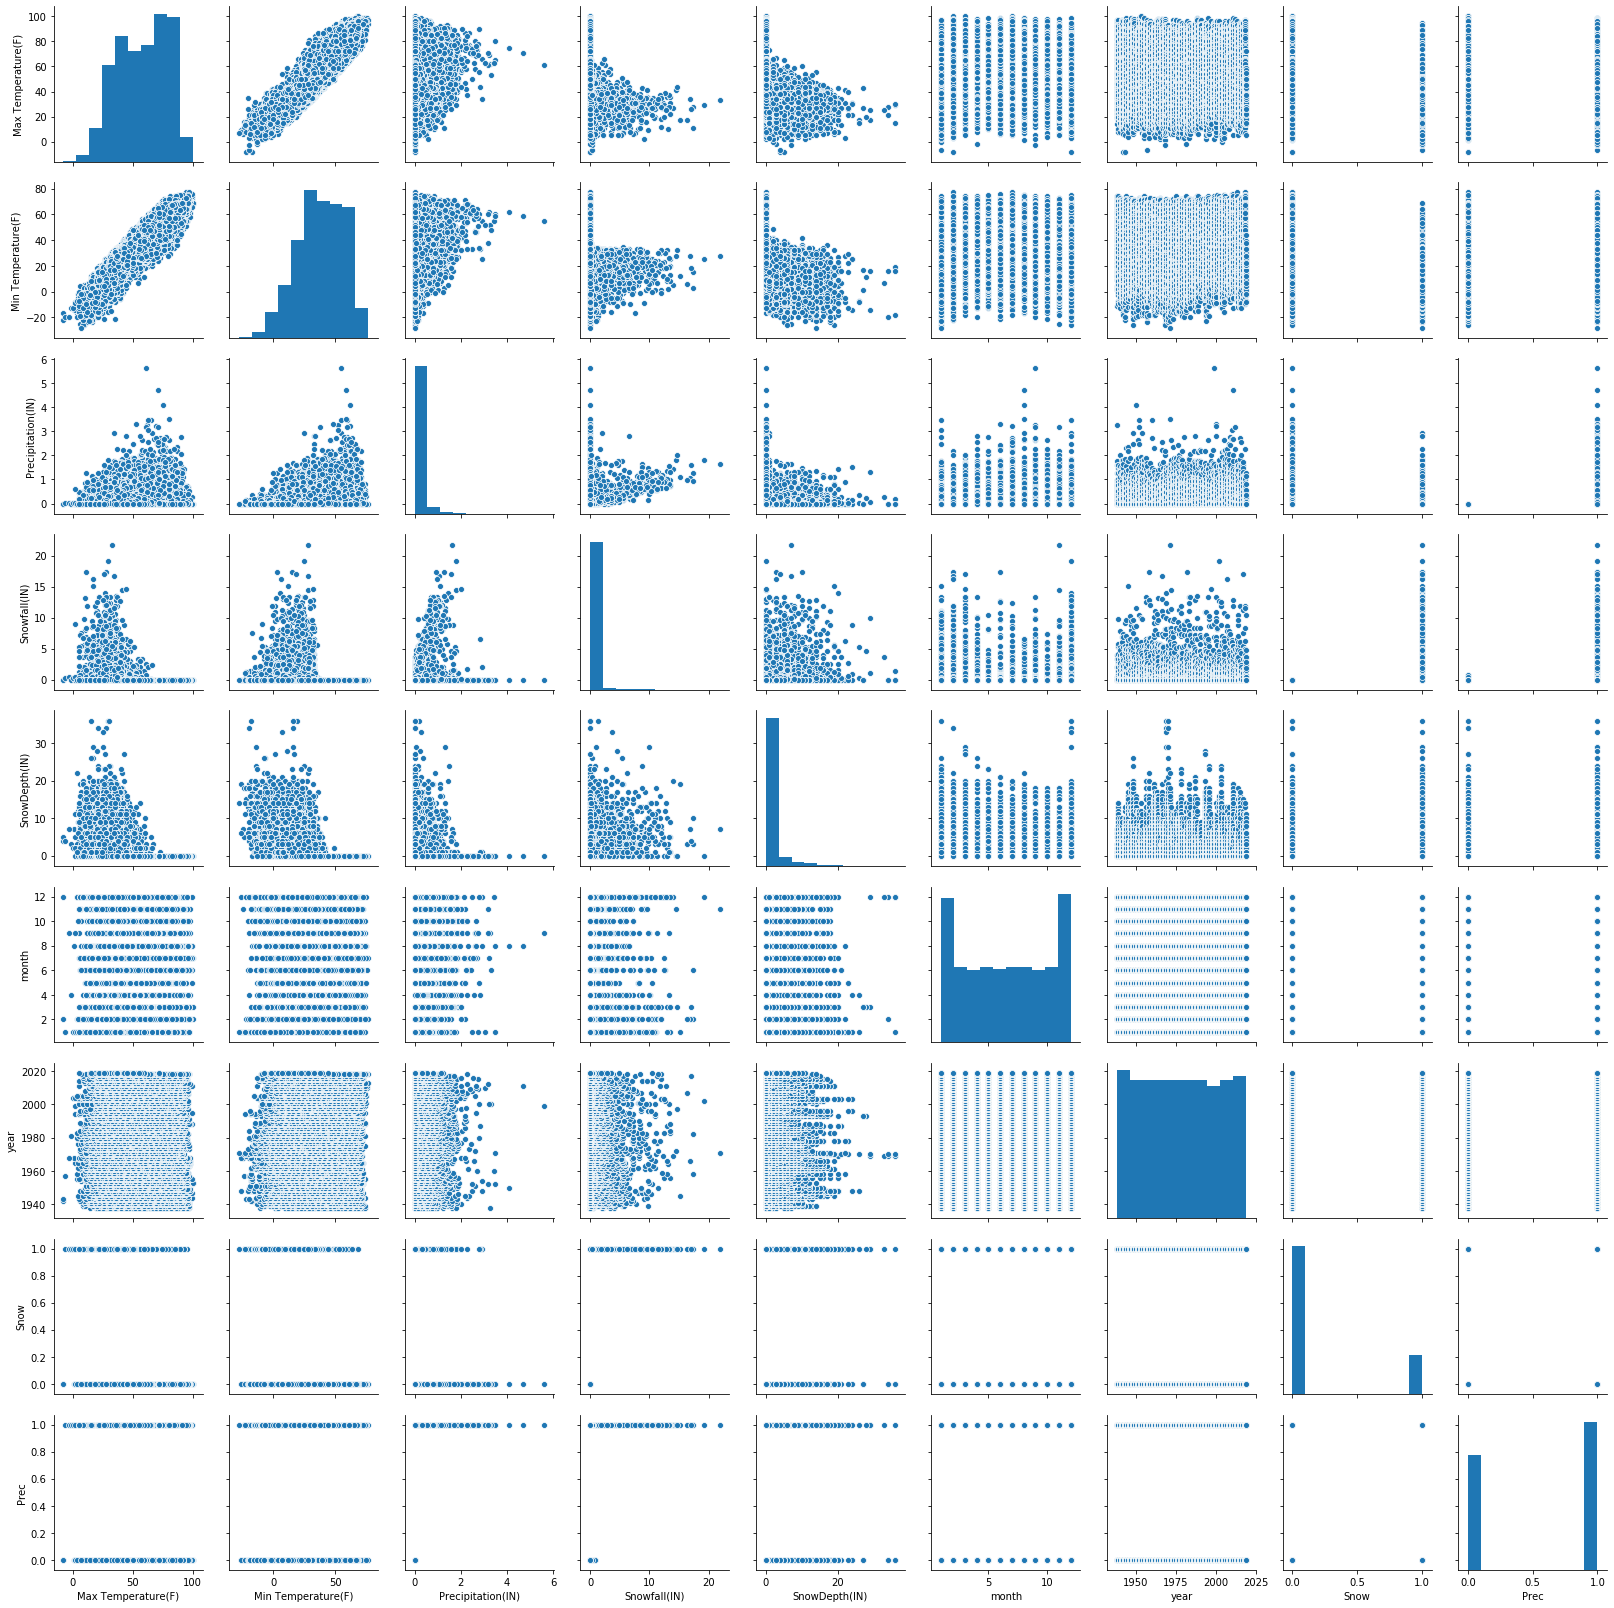

In [47]:
sns.pairplot(df)

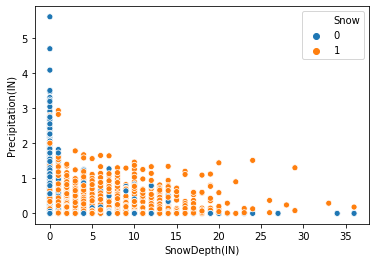

In [48]:
sns.scatterplot(x=df['SnowDepth(IN)'], y=df['Precipitation(IN)'],hue=df['Snow'])

#  Creating a model to predict Snowfall on particular day.

1st Step is to drop unwanted columns/feature that do not have any effect

In [49]:
df.drop('Date',axis=1, inplace=True)

Checking for null values and dropping them out to avoid conflicts later

In [50]:
df.dropna()
df.isnull().values.any()


True

Shows  which column has null values

In [51]:
df.isnull().any()

Max Temperature(F)    False
Min Temperature(F)    False
Precipitation(IN)      True
Snowfall(IN)          False
SnowDepth(IN)         False
month                 False
year                  False
Snow                  False
Prec                  False
dtype: bool

To check the total number of null records

In [52]:
df.isnull().T.any().T.sum()

1

Resetting the index after clearning null values

In [53]:
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)

In [54]:
df.isnull().T.any().T.sum() #Rechecking for null values

0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29379 entries, 0 to 29378
Data columns (total 9 columns):
Max Temperature(F)    29379 non-null int64
Min Temperature(F)    29379 non-null int64
Precipitation(IN)     29379 non-null float64
Snowfall(IN)          29379 non-null float64
SnowDepth(IN)         29379 non-null float64
month                 29379 non-null int64
year                  29379 non-null int64
Snow                  29379 non-null int64
Prec                  29379 non-null int64
dtypes: float64(3), int64(6)
memory usage: 2.0 MB


In [56]:
df=df[df['SnowDepth(IN)']<21]

In [57]:
df.shape
df.drop('Precipitation(IN)', axis=1,inplace=True)

In [58]:
df

,Max Temperature(F),Min Temperature(F),Snowfall(IN),SnowDepth(IN),month,year,Snow,Prec
0,80,47,0.0,0.0,1,1938,0,0
1,79,49,0.0,0.0,2,1938,0,1
2,74,57,0.0,0.0,3,1938,0,1
3,77,49,0.0,0.0,4,1938,0,0
4,72,56,0.0,0.0,5,1938,0,0
...,...,...,...,...,...,...,...,...
29374,57,26,0.0,0.0,3,2019,0,0
29375,46,28,0.0,0.0,3,2019,0,0
29376,45,21,0.0,0.0,3,2019,0,0
29377,50,22,0.0,0.0,3,2019,0,0


In [59]:
df_snow=df.drop(['SnowDepth(IN)','Snowfall(IN)'],axis=1)

In [60]:
df_snow.head()

,Max Temperature(F),Min Temperature(F),month,year,Snow,Prec
0,80,47,1,1938,0,0
1,79,49,2,1938,0,1
2,74,57,3,1938,0,1
3,77,49,4,1938,0,0
4,72,56,5,1938,0,0


# Creating feature and label for snow prediction

In [61]:
X_snow=df_snow.drop('Snow',axis=1)

In [62]:
y_snow=df_snow['Snow']

# Creating feature and label for rain prediction

In [63]:
X=df.drop('Prec',axis=1)


y=df['Prec']

In [64]:
X

,Max Temperature(F),Min Temperature(F),Snowfall(IN),SnowDepth(IN),month,year,Snow
0,80,47,0.0,0.0,1,1938,0
1,79,49,0.0,0.0,2,1938,0
2,74,57,0.0,0.0,3,1938,0
3,77,49,0.0,0.0,4,1938,0
4,72,56,0.0,0.0,5,1938,0
...,...,...,...,...,...,...,...
29374,57,26,0.0,0.0,3,2019,0
29375,46,28,0.0,0.0,3,2019,0
29376,45,21,0.0,0.0,3,2019,0
29377,50,22,0.0,0.0,3,2019,0


In [65]:
y

0        0
1        1
2        1
3        0
4        0
        ..
29374    0
29375    0
29376    0
29377    0
29378    1
Name: Prec, Length: 29352, dtype: int64

In [66]:
import sklearn

In [67]:
from sklearn.model_selection import train_test_split

# Rain Prediction

## Train Test Split for rain prediction

In [68]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression



In [70]:
logmodel=LogisticRegression()


# Logistic model for rain prediction

Fitting the data

In [71]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Getting predictions on the test data

In [72]:
predictions=logmodel.predict(X_test)

Importing confusion matrix to check the accuracy of the model built

In [73]:


from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      3876
           1       0.80      0.78      0.79      4930

    accuracy                           0.77      8806
   macro avg       0.77      0.77      0.77      8806
weighted avg       0.77      0.77      0.77      8806



We get around 77 % accuracy

In [75]:
print(confusion_matrix(y_test,predictions))

[[2916  960]
 [1076 3854]]


## Evaluating the model on custom_data

Fetching a random record from the dataframe

In [76]:
import random
random.seed(21)
random_day=random.randint(0,len(df))

In [77]:
new_rec=df.drop('Prec',axis=1).iloc[random_day]
new_rec

Max Temperature(F)      68.0
Min Temperature(F)      37.0
Snowfall(IN)             0.0
SnowDepth(IN)            0.0
month                    3.0
year                  1953.0
Snow                     0.0
Name: 5407, dtype: float64

Reshaping the record to get only the numeric values from it

In [78]:
new_rec= new_rec.values.reshape(1,7)


We can also try it by inserting  value of today's weather and check the predictions for Albany

order=[[max_temp,MIN_TEMP,SNOWFALL,SNOWDEPTH,MONTH,YEAR,SNOW]]

In [79]:
own_rec=np.array([[  38.,   26.,    1.0,    0.01,    2., 2020.,    1.]])

In [80]:
own_rec.shape

(1, 7)

## Pass the variable to predict method to get the output

In [81]:
logmodel.predict(new_rec)

array([0], dtype=int64)

Compare the result with original data

In [82]:
df.iloc[random_day]['Prec']

0.0

# Snow Prediction

## Train Test Split for snow prediction

In [83]:
X_strain, X_stest, y_strain, y_stest = train_test_split(X_snow, y_snow, test_size=0.30, random_state=42)

Fit the model with training data

In [84]:
logmodel.fit(X_strain,y_strain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Get the predictions on test set

In [85]:
pred_snow=logmodel.predict(X_stest)

To compare the output of the model (True results vs prediction)

In [86]:
print(classification_report(y_stest,pred_snow))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7032
           1       0.88      0.89      0.89      1774

    accuracy                           0.95      8806
   macro avg       0.93      0.93      0.93      8806
weighted avg       0.95      0.95      0.95      8806



In [87]:
print(confusion_matrix(y_stest,pred_snow))

[[6821  211]
 [ 193 1581]]


For random record fetching

In [88]:
random.seed(20)
random_snow_day=random.randint(0,len(df_snow))

In [89]:
new_rec_snow=df_snow.drop('Snow',axis=1).iloc[random_snow_day]


For custom record creation

Format :([[Max_Temp, Min_Temp,Month,Year,Prec]])

In [90]:
own_rec_snow=np.array([[  83.,   59.,9., 2003., 1.]])

In [91]:
own_rec_snow.shape

(1, 5)

In [92]:
new_rec_snow= new_rec_snow.values.reshape(1,5)

# Passing the record to predict method()

In [93]:
logmodel.predict(new_rec_snow)

array([0], dtype=int64)

# Comparing the output with original value

In [94]:
df_snow.iloc[random_snow_day]

Max Temperature(F)      83
Min Temperature(F)      59
month                    9
year                  2003
Snow                     0
Prec                     1
Name: 23711, dtype: int64